In [173]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
from datetime import timedelta

In [174]:
folder = "3.14/origin/"
#folder = "3.14/hpcc/"
starttime = 0
dt = 0.012

In [175]:
def read_out_tr(dir, file):
    col = ["events", "time", "from_node", "to_node", "pkt_type", "pkt_size", "flags", "fid", "src_addr", "dst_addr", "seq_num", "pkt_id"]
    df = pd.read_csv(dir+file, sep = ' ', header = None)
    df.columns = col
    return df

In [176]:
def get_receive_packets(df, src_addr):
    df_out = df.loc[df["events"].isin(["r"])]
    df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
    df_out = df_out.loc[df_out["dst_addr"].isin([5.0, 5.1, 5.2, 5.3])]
    df_out = df_out.loc[df_out["to_node"].isin([5])]
    df_out = df_out.loc[df_out["src_addr"].isin(src_addr)]
    return df_out

In [177]:
#raw_data = read_out_tr(folder, "HRCC.tr")
#raw_data = read_out_tr(folder, "AFQ10.tr")
#raw_data = read_out_tr(folder, "AFQ100.tr")
raw_data = read_out_tr(folder, "AFQ1000.tr")
#raw_data = read_out_tr(folder, "DropTail.tr")
#raw_data = read_out_tr(folder, "out.tr")

r_event_in_dst_0 = get_receive_packets(raw_data, [0.0, 0.1, 0.2, 0.3])
r_event_in_dst_1 = get_receive_packets(raw_data, [1.0, 1.1, 1.2, 1.3])
r_event_in_dst_2 = get_receive_packets(raw_data, [2.0, 2.1, 2.2, 2.3])
r_event_in_dst_3 = get_receive_packets(raw_data, [3.0, 3.1, 3.2, 3.3])

In [178]:
#raw_data = read_out_tr(folder, "HRCC_one_flow.tr")
#r_event_in_dst_0 = get_receive_packets(raw_data, [0.0, 0.1, 0.2, 0.3])

In [179]:
r_event_in_dst_1

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
10933,r,0.000810,4,5,tcp,40,-------,1,1.0,5.1,0,1805
11197,r,0.000827,4,5,tcp,1040,-------,1,1.0,5.1,1,1846
11209,r,0.000828,4,5,tcp,1040,-------,1,1.0,5.1,2,1847
11469,r,0.000846,4,5,tcp,1040,-------,1,1.0,5.1,3,1889
11481,r,0.000847,4,5,tcp,1040,-------,1,1.0,5.1,4,1890
11493,r,0.000847,4,5,tcp,1040,-------,1,1.0,5.1,5,1892
11505,r,0.000848,4,5,tcp,1040,-------,1,1.0,5.1,6,1893
11773,r,0.000866,4,5,tcp,1040,-------,1,1.0,5.1,7,1935
11785,r,0.000867,4,5,tcp,1040,-------,1,1.0,5.1,8,1936
11797,r,0.000867,4,5,tcp,1040,-------,1,1.0,5.1,9,1938


In [180]:
r_event_in_dst_0['ts'] = r_event_in_dst_0['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_1['ts'] = r_event_in_dst_1['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_2['ts'] = r_event_in_dst_2['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_3['ts'] = r_event_in_dst_3['time'].apply(lambda x: pd.Timedelta(x,unit='s'))

In [181]:
#r_event_in_dst_0['ts'] = r_event_in_dst_0['time'].apply(lambda x: pd.Timedelta(x,unit='s'))

In [182]:
#pkt_size_series = pd.Series(r_event_in_dst_1['pkt_size'], index=r_event_in_dst['ts'])

In [183]:
# H       hourly frequency
# T, min  minutely frequency
# S       secondly frequency
# L, ms   milliseonds
# U, us   microseconds
# N       nanoseconds
microseconds = 12
shortTh_0 = r_event_in_dst_0[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
# GB
shortTh_0['throughtput'] = shortTh_0['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_1 = r_event_in_dst_1[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_1['throughtput'] = shortTh_1['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_2 = r_event_in_dst_2[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_2['throughtput'] = shortTh_2['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_3 = r_event_in_dst_3[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_3['throughtput'] = shortTh_3['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000

shortTh_0.head()

,pkt_size,throughtput
ts,,
00:00:00.000016,40,0.026667
00:00:00.000028,2080,1.386667
00:00:00.000040,4160,2.773333
00:00:00.000052,8320,5.546667
00:00:00.000064,10400,6.933333


In [184]:
#microseconds = 12
#shortTh_0 = r_event_in_dst_0[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
# GB
#shortTh_0['throughtput'] = shortTh_0['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000

In [185]:
shortTh_1.head()

,pkt_size,throughtput
ts,,
00:00:00.000810,40,0.026667
00:00:00.000822,2080,1.386667
00:00:00.000834,0,0.000000
00:00:00.000846,4160,2.773333
00:00:00.000858,5200,3.466667


In [186]:
res_0 = shortTh_0[['throughtput']].unstack()['throughtput'].T
res_0.index = res_0.index / timedelta(seconds=1)

res_1 = shortTh_1[['throughtput']].unstack()['throughtput'].T
res_1.index = res_1.index / timedelta(seconds=1)

res_2 = shortTh_2[['throughtput']].unstack()['throughtput'].T
res_2.index = res_2.index / timedelta(seconds=1)

res_3 = shortTh_3[['throughtput']].unstack()['throughtput'].T
res_3.index = res_3.index / timedelta(seconds=1)



In [187]:
#res_0 = shortTh_0[['throughtput']].unstack()['throughtput'].T
#res_0.index = res_0.index / timedelta(seconds=1)
res_0

ts
0.000016     0.026667
0.000028     1.386667
0.000040     2.773333
0.000052     5.546667
0.000064     6.933333
0.000076     9.706667
0.000088    10.400000
0.000100     9.706667
0.000112     9.706667
0.000124    10.400000
0.000136     9.706667
0.000148    10.400000
0.000160     9.706667
0.000172    10.400000
0.000184     9.706667
0.000196     9.706667
0.000208    10.400000
0.000220     9.706667
0.000232    10.400000
0.000244     9.706667
0.000256    10.400000
0.000268     9.706667
0.000280     9.706667
0.000292    10.400000
0.000304     9.706667
0.000316    10.400000
0.000328     9.706667
0.000340    10.400000
0.000352     9.706667
0.000364     9.706667
              ...    
0.011656     9.706667
0.011668    10.400000
0.011680     9.706667
0.011692    10.400000
0.011704     9.706667
0.011716    10.400000
0.011728     9.706667
0.011740     9.706667
0.011752    10.400000
0.011764     9.706667
0.011776    10.400000
0.011788     9.706667
0.011800     9.706667
0.011812    10.400000
0.01182

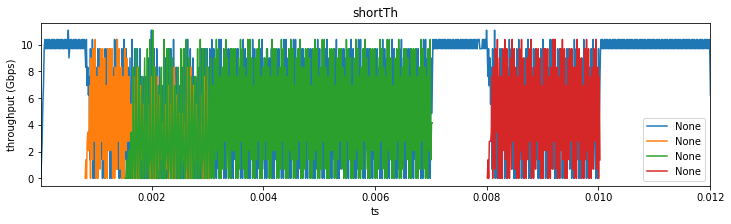

In [188]:
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0.plot(kind='line', legend=True, title='shortTh', figsize=(12,3))
res_1.plot(kind='line', legend=True, title='shortTh', figsize=(12,3))
res_2.plot(kind='line', legend=True, title='shortTh', figsize=(12,3))
res_3.plot(kind='line', legend=True, title='shortTh', figsize=(12,3))

#line0 = plt.plot(res0[ts], res0[throughput], color='red', label=label0)
#line1 = plt.plot(res1[ts], res1[throughput], color='blue', label=label1)
#line2 = plt.plot(res2[ts], res2[throughput], color='green', label=label2)
#line3 = plt.plot(res3[ts], res3[throughput], color='yellow', label=label3)




plt.show()